In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

#gmap
import gmaps

# Google developer API key
from config import g_key
gmaps.configure(api_key=g_key)

from geopy.geocoders import GoogleV3

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
data_engineer = pd.read_csv("DataEngineer.csv")
data_engineer.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [4]:
data_analyst = pd.read_csv("DataAnalyst.csv")

data_analyst = data_analyst.drop(columns=["Unnamed: 0"])
data_analyst.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
data_science = pd.read_csv("DataScientist.csv")

data_science = data_science.drop(columns=["Unnamed: 0","index"])
data_science.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [6]:
# concatinate all 3 dataframe into final dataframe

list_df = [data_science, data_analyst, data_engineer]

final_df = pd.concat(list_df)
final_df


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


In [7]:
industry_ranking = final_df['Industry'].value_counts(sort=True)
industry_ranking
# delete -1 !! or change it to Unknown

-1                                     1277
IT Services                            1152
Staffing & Outsourcing                  838
Computer Hardware & Software            619
Internet                                448
                                       ... 
Museums, Zoos & Amusement Parks           1
Auto Repair & Maintenance                 1
Shipping                                  1
Self-Storage Services                     1
Catering & Food Service Contractors       1
Name: Industry, Length: 109, dtype: int64

In [38]:
industry = pd.DataFrame(industry_ranking)
industry_g = industry.head(6)

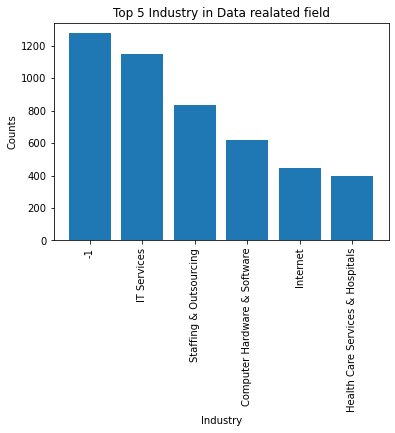

<Figure size 432x288 with 0 Axes>

In [9]:
#Plot the bar chart using pandas
y_values = industry_g['Industry']
x_values = industry_g.index.values

plt.bar(x_values,y_values)

#measurements_bar = measurement_count.plot(kind= "bar", figsize=(6,4),
                                          #facecolor= "green", align= "center", fontsize= "8", rot = 45)
# Formatting - title and axes
plt.title("Top 5 Industry in Data realated field")
plt.xlabel("Industry")
plt.ylabel("Counts")

plt.xticks(rotation = 90)
# Show and layout
plt.show()
plt.tight_layout()

In [10]:
company_ranking = final_df['Company Name'].str.split(pat="\n").str[0]
                                               
#company_ranking = final_df['Company Name'].value_counts(sort=True)
company_ranking = company_ranking.value_counts(sort=True)

In [11]:
company = pd.DataFrame(company_ranking)
company_g = company.head(5)
company_g

,Company Name
Apple,88
"Staffigo Technical Services, LLC",86
Amazon,78
IBM,64
Diverse Lynx,62


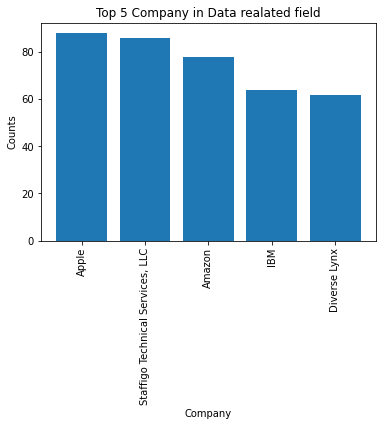

<Figure size 432x288 with 0 Axes>

In [12]:
#Plot the bar chart using pandas
y_values = company_g['Company Name']
x_values = company_g.index.values

plt.bar(x_values,y_values)

# Formatting - title and axes
plt.title("Top 5 Company in Data realated field")
plt.xlabel("Company")
plt.ylabel("Counts")

plt.xticks(rotation = 90)
# Show and layout
plt.show()
plt.tight_layout()

In [13]:
final_df['Location']

0         New York, NY
1         New York, NY
2         New York, NY
3        Lyndhurst, NJ
4         New York, NY
             ...      
2523      Westlake, TX
2524    Fort Worth, TX
2525        Irving, TX
2526      Westlake, TX
2527      Westlake, TX
Name: Location, Length: 8690, dtype: object

In [18]:
state_df = final_df['Location'].str.split(pat=", ").str[1]
final_df['State'] = state_df
final_df['State'].value_counts(sort=True).head(10)

TX    2647
CA    2295
NY     845
IL     727
PA     611
AZ     592
FL     224
OH     212
NJ     142
NC      90
Name: State, dtype: int64

In [31]:
geolocator = GoogleV3(g_key)

for index, row in final_df.iterrows():
    # Initiate geocode function
    location = geolocator.geocode(row["Location"], timeout=10)
    # Locate the location and get an output lat & lng
    final_df.loc[index,"Latitude"] = location.latitude
    final_df.loc[index,"Longitude"] = location.longitude
final_df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State,Latitude,Longitude
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,NY,40.712775,-74.005973
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,NY,40.712775,-74.005973
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,NY,40.712775,-74.005973
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,NJ,40.712775,-74.005973
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,NY,40.712775,-74.005973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1,TX,32.991235,-97.195014
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1,TX,32.755488,-97.330766
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,TX,32.814018,-96.948894
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1,TX,32.991235,-97.195014


In [32]:
location_groupby = final_df.groupby("Location")

job_count = location_groupby["Job Title"].count()
one_lat = location_groupby["Latitude"].first()
one_long = location_groupby["Longitude"].first()

final_clean_df = pd.DataFrame(
    {
        "Job Count": job_count,
        "Latitude": one_lat,
        "Longitude": one_long,
    }
)
final_clean_df

,Job Count,Latitude,Longitude
Location,,,
"Addison, TX",6,32.755488,-97.330766
"Alachua, FL",1,41.878114,-87.629798
"Alameda, CA",1,30.267153,-97.743061
"Alhambra, CA",2,29.760427,-95.369803
"Allegheny West, PA",3,32.776664,-96.796988
...,...,...,...
"Woodbridge, NJ",1,34.180839,-118.308966
"Woodcliff Lake, NJ",1,41.878114,-87.629798
"Woodland Hills, CA",15,34.021122,-118.396467


In [37]:
location = final_clean_df[["Latitude","Longitude"]]
weight = final_clean_df["Job Count"]
# Plot Heatmap
fig = gmaps.figure()

#create heat layer
heat_layer = gmaps.heatmap_layer(location,
                                 weights=weight,
                                 dissipating=False,
                                 max_intensity=100,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))